# Plots from the Experiments

In [1]:
# Libraries
import io
import json
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## "Fuffa" Experiment SMAC
0: Logistic Regression
1: SVM
2: Knn
3: adaboost
4: xgboost
5: Random Forest
6: ExtraTrees
7: MLP

In [52]:
# Prepare the dictionaries
res_to_plot_rr = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    "best": []
}
res_to_plot_erb = deepcopy(res_to_plot_rr)
res_to_plot_rucb = deepcopy(res_to_plot_rr)
res_to_plot_adarucb = deepcopy(res_to_plot_rr)

In [53]:
# Read the Json files
dir = "../experiments/Test_Exp1_bohb/"

# Round Robin
name = dir + "RoundRobin_results.json"
with io.open(name, 'rb') as json_file:
    data = json.load(json_file)

res_to_plot_rr["best"] = data["recommendation"]
budget = len(data["pulled_arms"])
for i in range(budget):
    arm = data["pulled_arms"][i]
    res_to_plot_rr[arm].append(data["scores"][i])

# Efficient CASH
name = dir + "EfficientCash_results.json"
with io.open(name, 'rb') as json_file:
    data = json.load(json_file)

res_to_plot_erb["best"] = data["recommendation"]
res_to_plot_erb["deletion"] = data["deleted"]
for i in range(budget):
    arm = data["pulled_arms"][i]
    res_to_plot_erb[arm].append(data["scores"][i])

# R-UCB
name = dir + "RUCB_results.json"
with io.open(name, 'rb') as json_file:
    data = json.load(json_file)

res_to_plot_rucb["best"] = data["recommendation"]
for i in range(budget):
    arm = data["pulled_arms"][i]
    res_to_plot_rucb[arm].append(data["scores"][i])

# AdaR-UCB
name = dir + "AdaptiveRUCB_results.json"
with io.open(name, 'rb') as json_file:
    data = json.load(json_file)

res_to_plot_adarucb["best"] = data["recommendation"]
for i in range(budget):
    arm = data["pulled_arms"][i]
    res_to_plot_adarucb[arm].append(data["scores"][i])

In [57]:
# Function plotting the scores
def fun_plot(res_dict):
    plt.clf()
    plt.xlim(right=15)
    plt.figure(figsize=(20, 20))
    for algo in res_dict:
        if not isinstance(algo, int):
            continue
        x = np.arange(len(res_dict[algo]))
        y = res_dict[algo]
        plt.plot(x, y, "-o", label=str(algo))
    plt.title("Scores")
    plt.xlabel("Time")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend(loc="best")

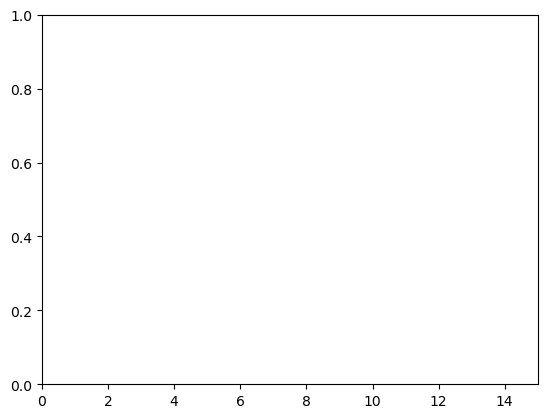

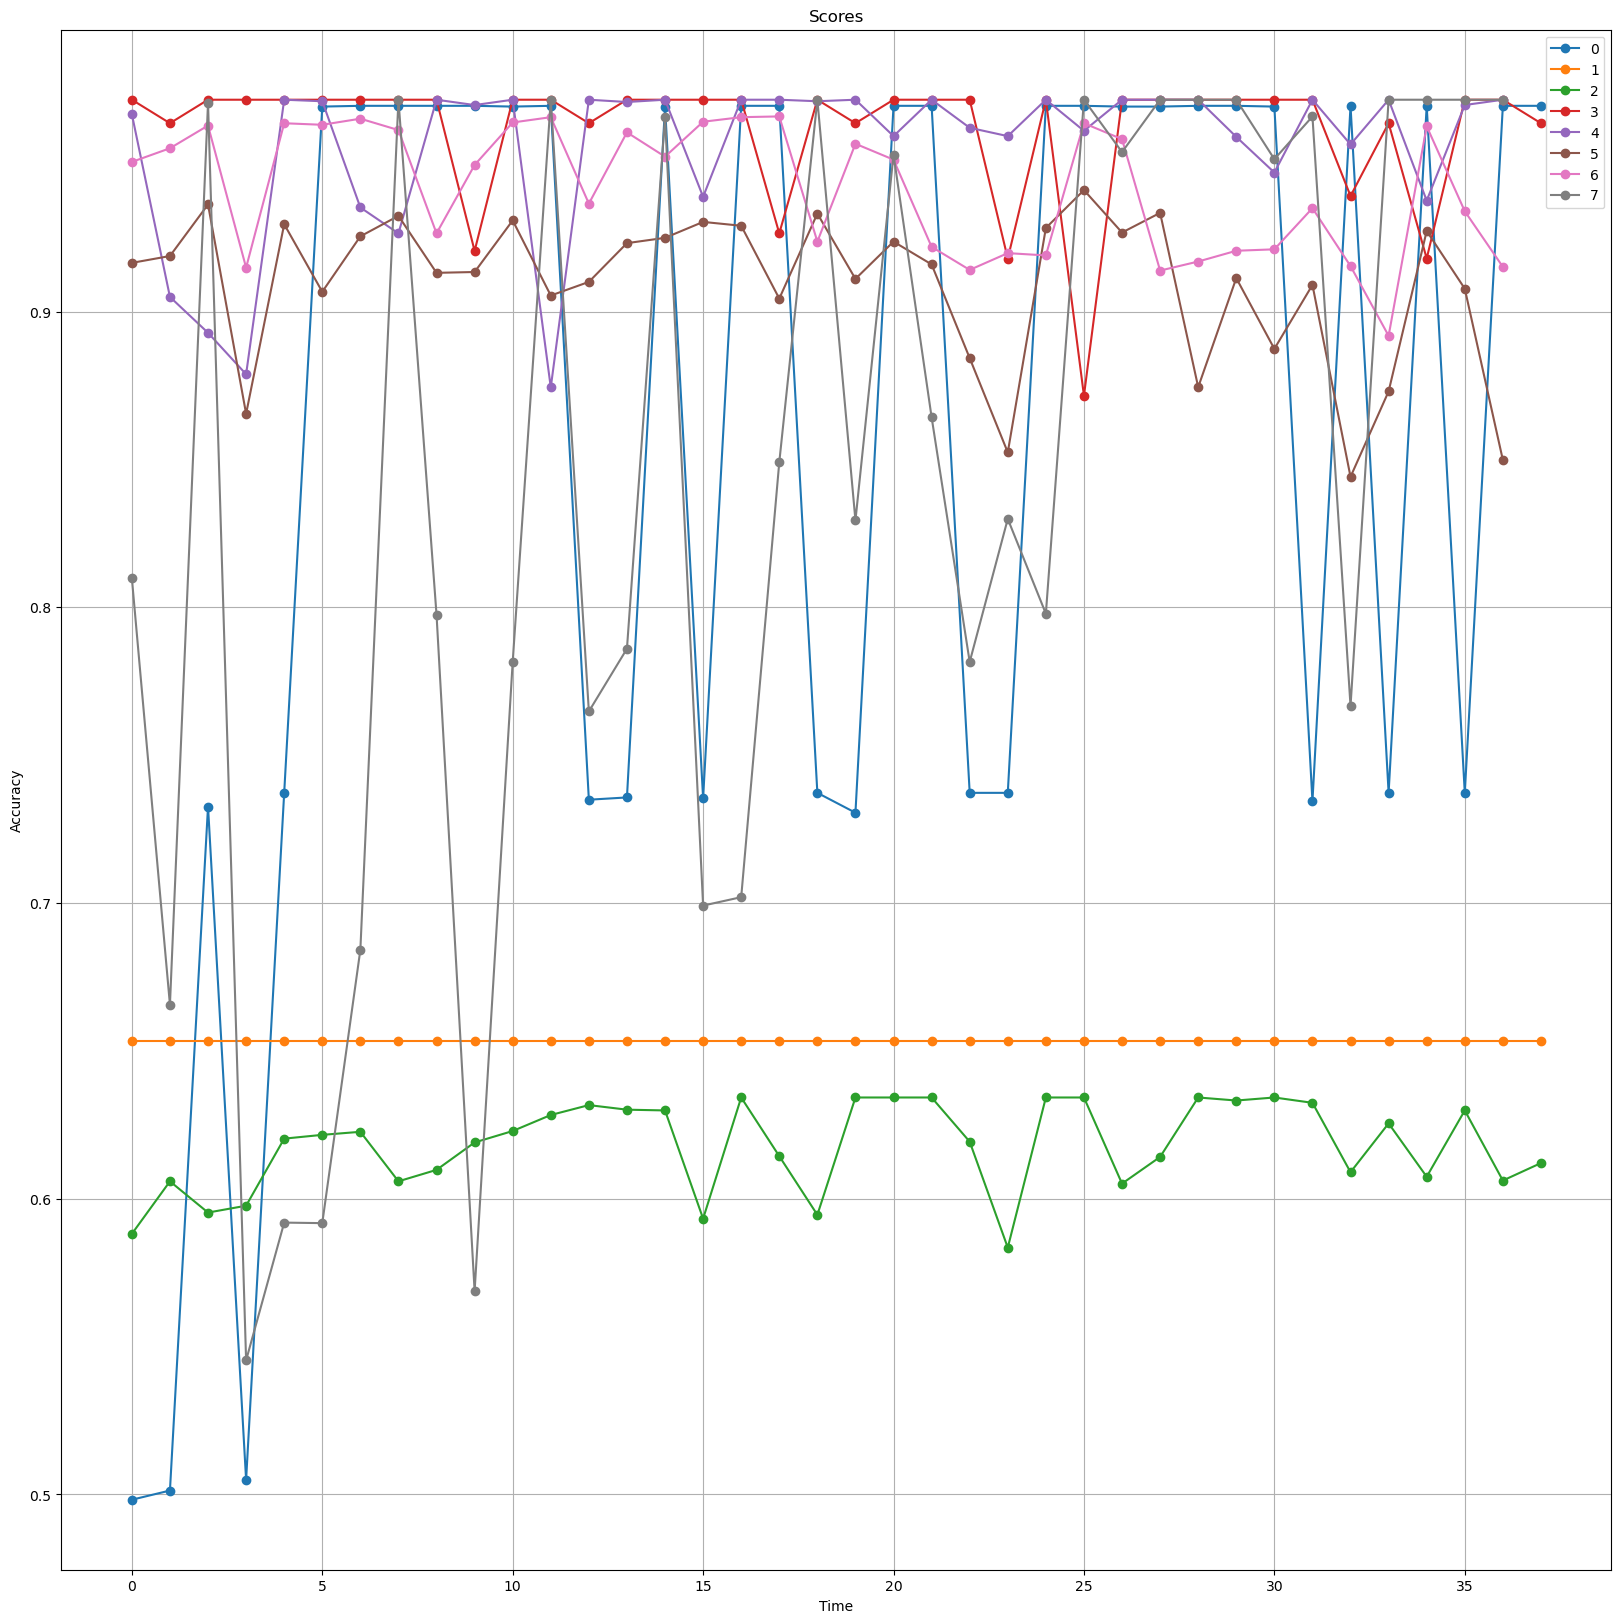

In [58]:
fun_plot(res_to_plot_rr)

<Figure size 640x480 with 0 Axes>

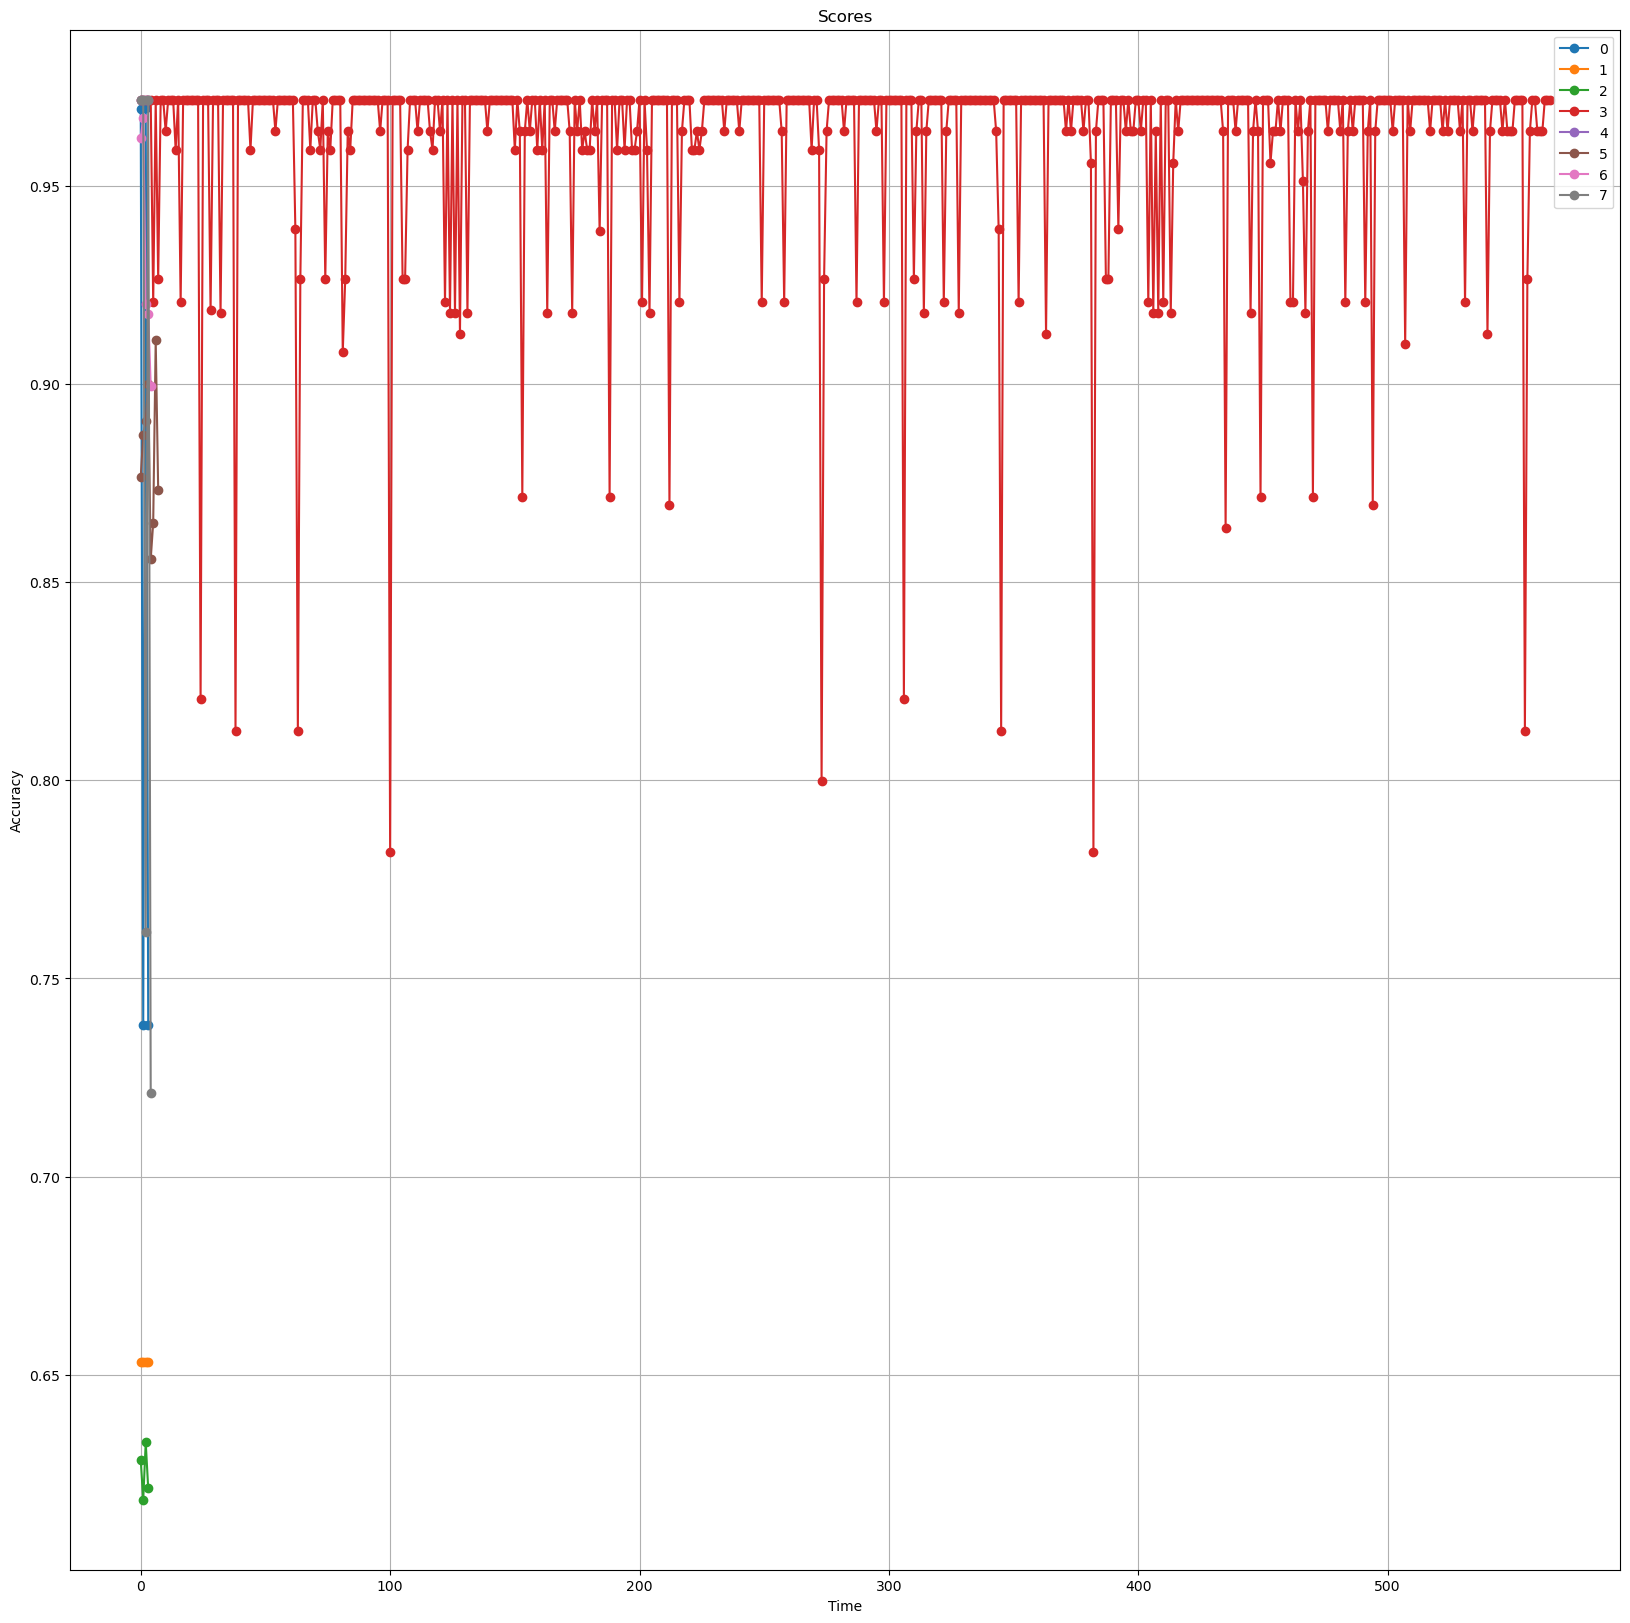

In [36]:
fun_plot(res_to_plot_erb)

<Figure size 640x480 with 0 Axes>

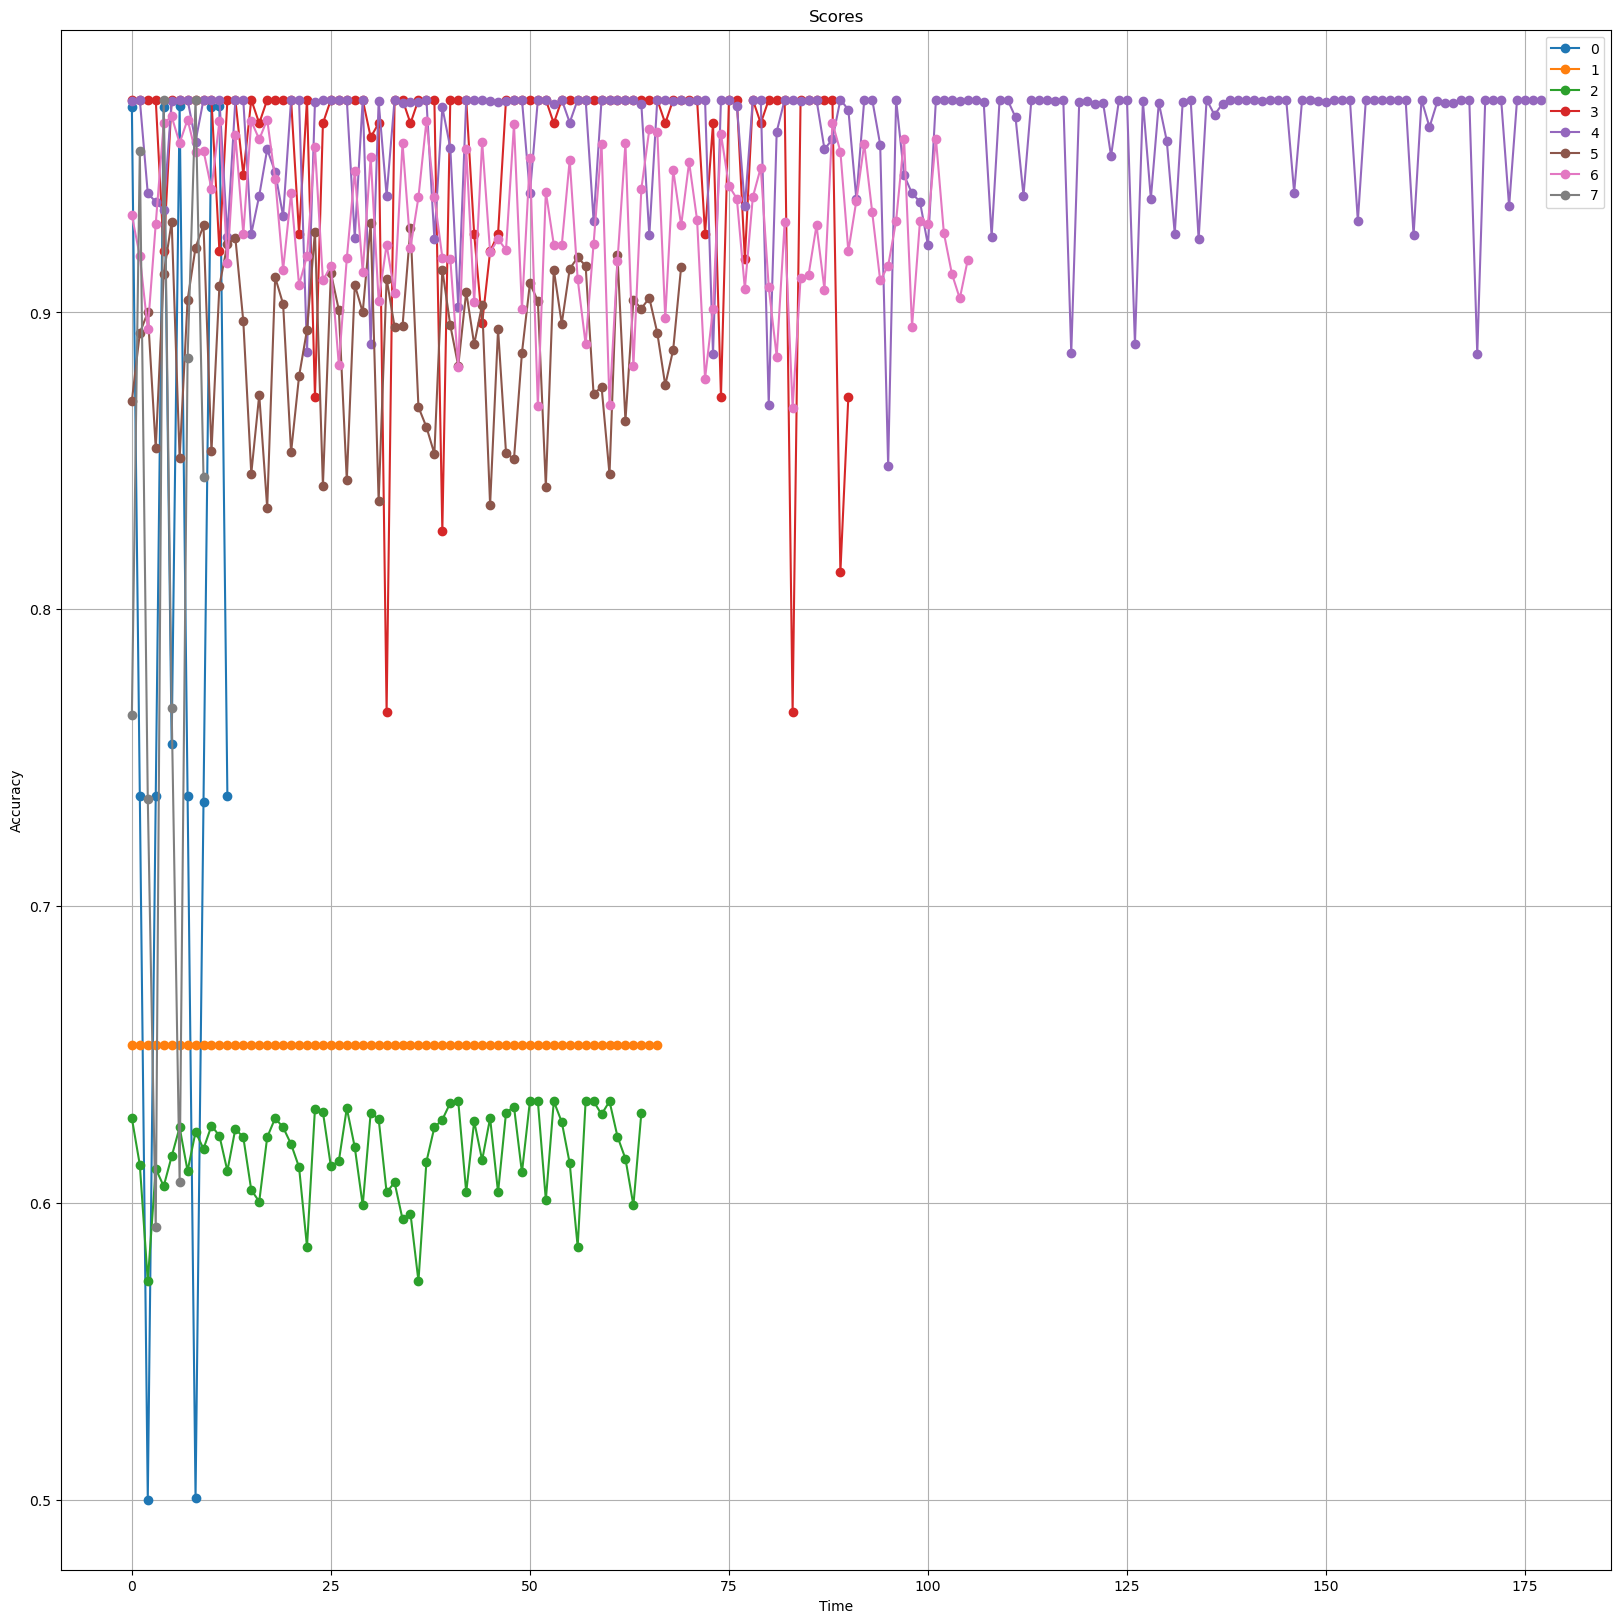

In [37]:
fun_plot(res_to_plot_rucb)

<Figure size 640x480 with 0 Axes>

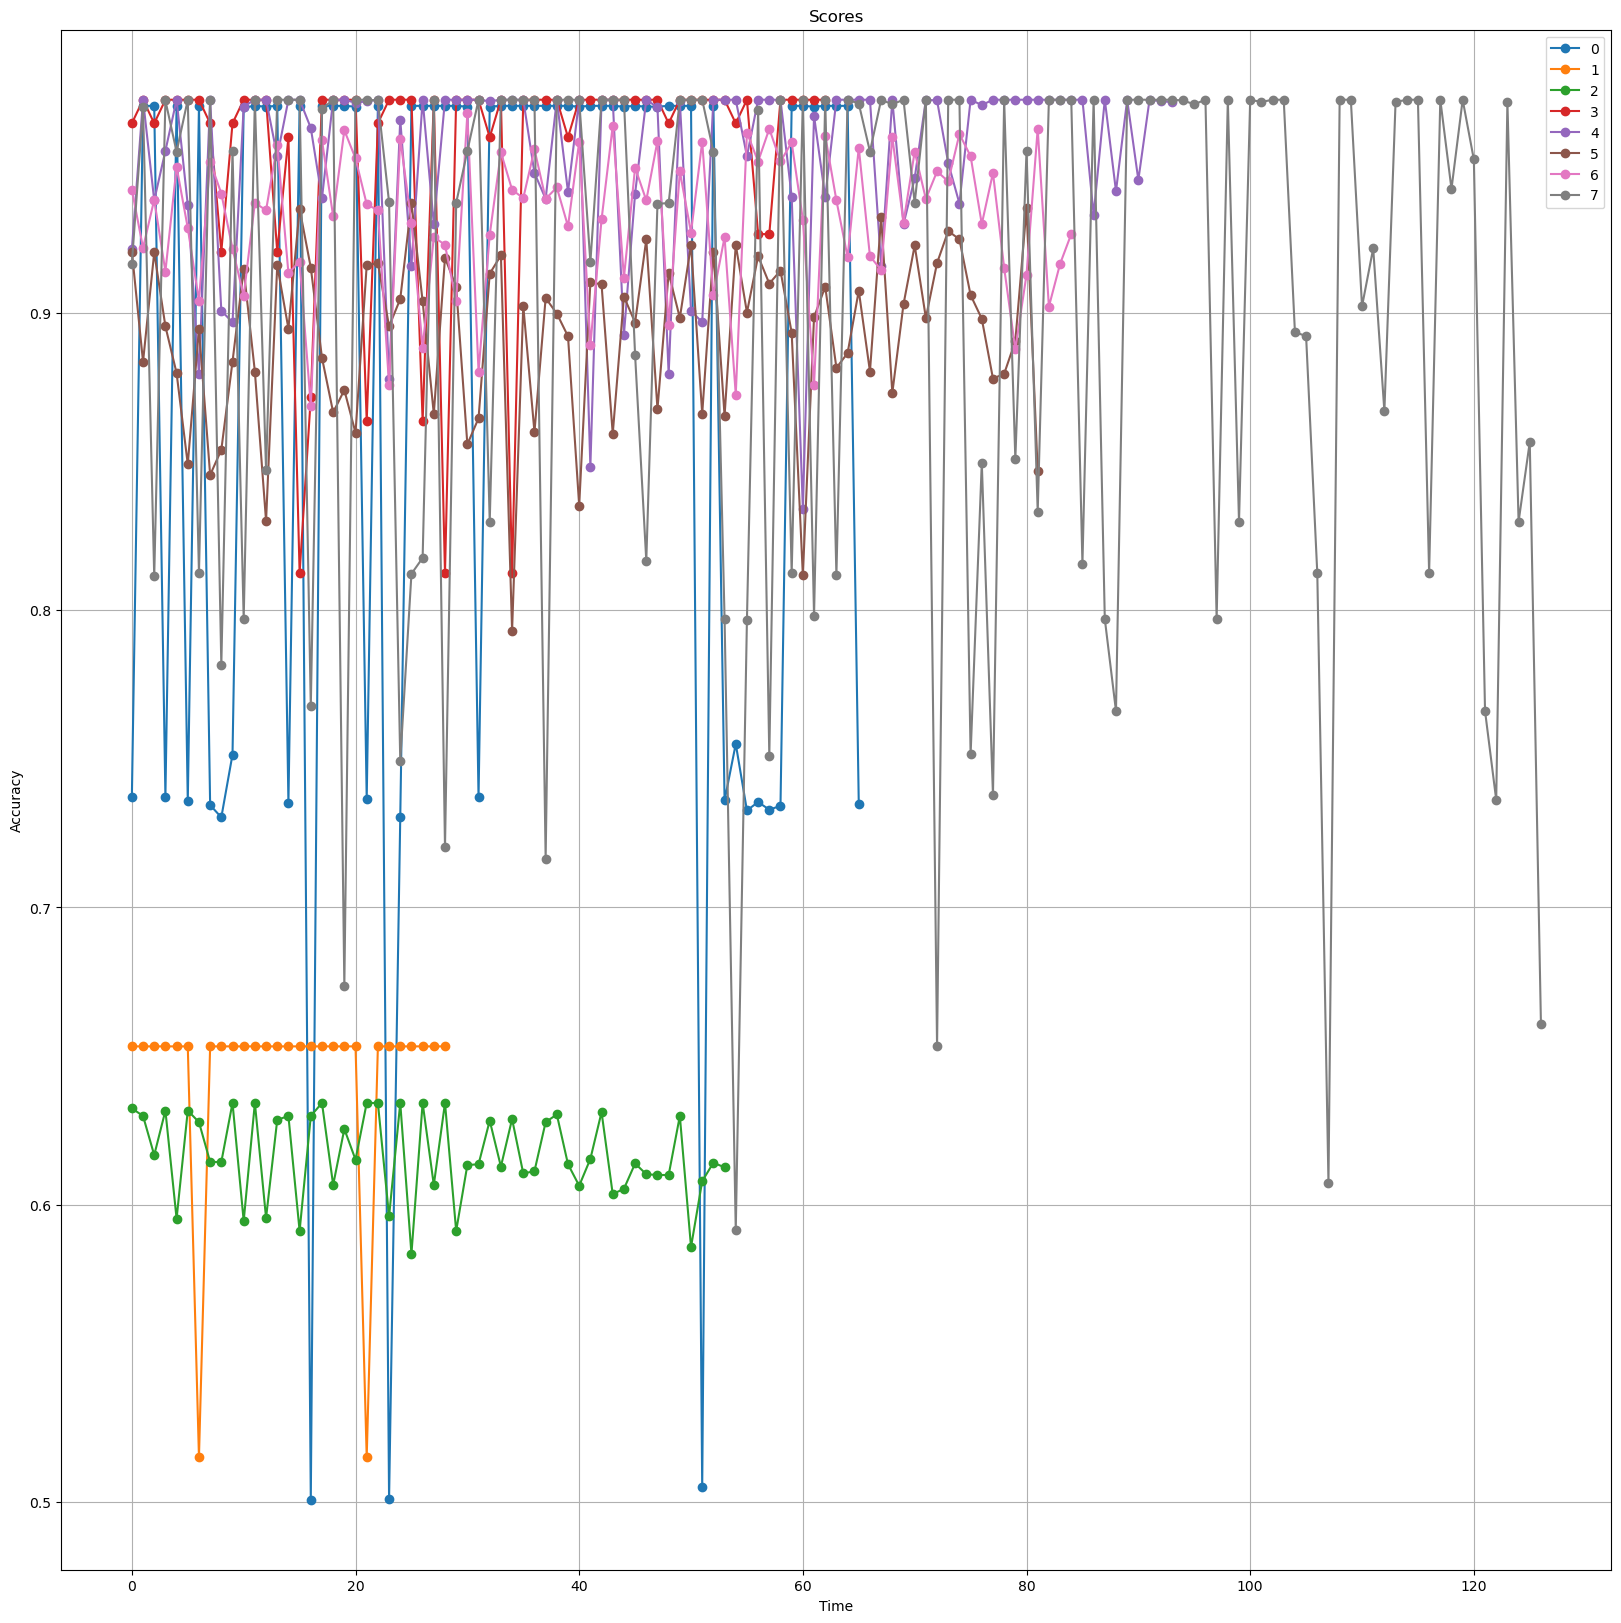

In [38]:
fun_plot(res_to_plot_adarucb)

## Test on RunHistory

In [59]:
base = "experiments/Tuner_Curves_SMAC/"
name = base + "test_mlp/results_smac.json"
with io.open(name, 'rb') as json_file:
    data = json.load(json_file)

In [81]:
cost = data["data"][0][1][0]
conf_num = len(data["configs"])
res = np.zeros(conf_num)

for i in range(conf_num):
    res[i] = 1 - data["data"][i][1][0]

ma = []
i = 0
while i <= conf_num-20:
    ma.append(res[i:i+20].mean())
    i += 1

In [82]:
res

array([0.6223447 , 0.86147766, 0.97164948, 0.65327254, 0.97164948,
       0.97010309, 0.68780862, 0.65327254, 0.6223447 , 0.59141686,
       0.6594581 , 0.65327254, 0.6223447 , 0.72853027, 0.65327254,
       0.65327254, 0.46873645, 0.56048903, 0.97164948, 0.65327254,
       0.56048903, 0.62337563, 0.87474227, 0.56786149, 0.56048903,
       0.97164948, 0.65327254, 0.93659794, 0.59244779, 0.49966429,
       0.83316944, 0.65327254, 0.73309807, 0.62337563, 0.90154639,
       0.86134021, 0.59141686, 0.59208829, 0.97164948, 0.65327254,
       0.59141686, 0.56219138, 0.65327254, 0.97164948, 0.55327254,
       0.56219138, 0.68832408, 0.86134021, 0.53059212, 0.6223447 ,
       0.65327254, 0.60842717, 0.97164948, 0.43693365, 0.67891356,
       0.65327254, 0.97113402, 0.56151996, 0.83693365, 0.65327254,
       0.6223447 , 0.92120011, 0.65327254, 0.65327254, 0.56151996,
       0.97164948, 0.65327254, 0.65327254, 0.56151996, 0.65327254,
       0.65327254, 0.65327254, 0.53059212, 0.6223447 , 0.68609

In [83]:
ma

[0.711481892677769,
 0.7083891091726142,
 0.696484007401533,
 0.6916386465767907,
 0.6873680941052076,
 0.666810071371927,
 0.666887390959556,
 0.6651605868358446,
 0.6793268569918054,
 0.6778320116309806,
 0.6732443827650012,
 0.6819299497753105,
 0.6819299497753105,
 0.6874676182923605,
 0.6822098863335976,
 0.6946235791699709,
 0.7050269627279936,
 0.7111609833465502,
 0.7127409463388844,
 0.7127409463388844,
 0.7127409463388844,
 0.7142873380914617,
 0.7112281258260638,
 0.7001546391752577,
 0.7203440391223895,
 0.7199832143801215,
 0.6995103092783503,
 0.701262886597938,
 0.6975,
 0.6944072164948454,
 0.700541237113402,
 0.6915463917525771,
 0.6893041237113401,
 0.701231694422416,
 0.6919095955590799,
 0.680777954004758,
 0.6703745704467352,
 0.6893604282315622,
 0.6878320116309807,
 0.6810962199312713,
 0.6810962199312713,
 0.6826426116838487,
 0.700593047845625,
 0.700593047845625,
 0.6846742003700765,
 0.6850865715040972,
 0.7055594766058682,
 0.7038068992862806,
 0.69340351572

<Figure size 640x480 with 0 Axes>

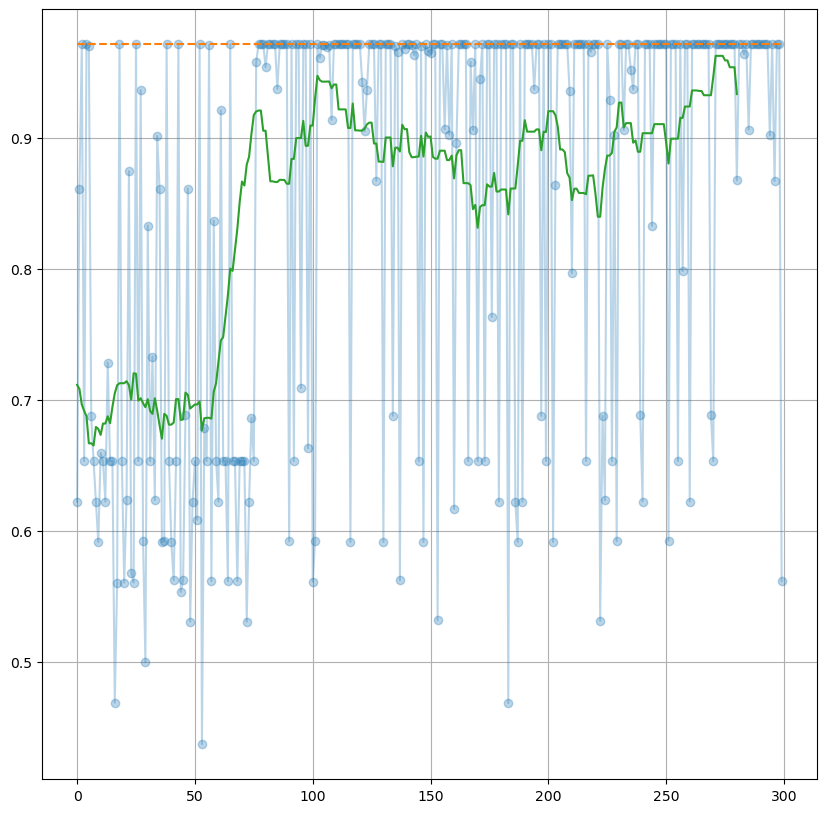

In [84]:
plt.clf()
plt.figure(figsize=(10, 10))
plt.plot(np.arange(len(res)), res, "-o", alpha=.3)
plt.plot(np.arange(len(res)), np.ones(len(res))*max(res), "--")
plt.plot(ma, "-")
plt.grid()
plt.show()

In [23]:
base = "../experiments/test_genetic/test_xgb/"
name = base + "GeneticTuner_results.json"
with io.open(name, 'rb') as json_file:
    data = json.load(json_file)

In [24]:
pops = len(data)
agents_per_pop = len(data["initial"])
res_mean = np.zeros(pops)
res_med = np.zeros(pops)

i = 0
for k in data:
    print(k)
    tmp = []
    for elem in data[k]:
        tmp.append(elem["block_eval"])
    tmp = np.array(tmp)
    print(tmp)
    res_mean[i] = np.mean(tmp)
    res_med[i] = np.median(tmp)
    i+=1
res_mean, res_med

initial
[0.92597938 0.86580227 0.97061856 0.97164948 0.96185567 0.95113138
 0.95984668 0.97164948 0.76215702 0.96291832]
1
[0.97164948 0.97113402 0.97164948 0.97061856 0.90648427 0.97061856
 0.97164948 0.97164948 0.97164948 0.90547978]
2
[0.97164948 0.97164948 0.94600846 0.97164948 0.90391488 0.97164948
 0.77194819 0.97061856 0.97164948 0.97164948]
3
[0.97164948 0.97164948 0.97164948 0.97164948 0.97164948 0.88639968
 0.97164948 0.97164948 0.96293154 0.97164948]
4
[0.97164948 0.97164948 0.97164948 0.97164948 0.85854613 0.88278086
 0.92600317 0.97164948 0.97164948 0.97164948]
5
[0.97164948 0.97061856 0.97164948 0.97164948 0.97164948 0.97164948
 0.97164948 0.97164948 0.97164948 0.97164948]
6
[0.97164948 0.97164948 0.97164948 0.97164948 0.97164948 0.94752842
 0.97164948 0.91726143 0.90701031 0.94548506]
7
[0.97164948 0.8178139  0.88227597 0.97164948 0.97164948 0.97164948
 0.97164948 0.97164948 0.97164948 0.97164948]
8
[0.97164948 0.97164948 0.97164948 0.97164948 0.97164948 0.97164948
 0.97

(array([0.93036082, 0.95825826, 0.9422387 , 0.96225271, 0.94688766,
        0.97154639, 0.95471821, 0.94732858, 0.97164948, 0.94315649,
        0.96728972, 0.95341211, 0.95372694, 0.94591145, 0.97108274,
        0.94521808, 0.94830796, 0.95635263, 0.96328681, 0.96009939]),
 array([0.96085118, 0.97139175, 0.97164948, 0.97164948, 0.97164948,
        0.97164948, 0.97164948, 0.97164948, 0.97164948, 0.97113402,
        0.97164948, 0.97164948, 0.97164948, 0.97164948, 0.97164948,
        0.97164948, 0.97164948, 0.97164948, 0.97164948, 0.97164948]))

<Figure size 640x480 with 0 Axes>

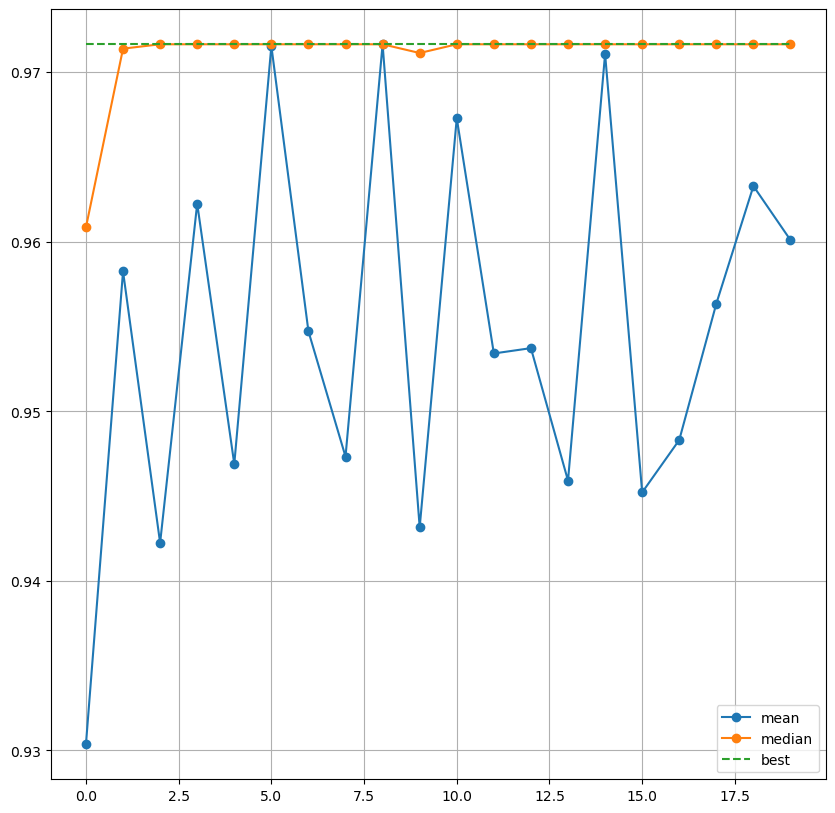

In [25]:
plt.clf()
plt.figure(figsize=(10, 10))
plt.plot(np.arange(len(res_mean)), res_mean, "-o", alpha=1, label="mean")
plt.plot(np.arange(len(res_med)), res_med, "-o", alpha=1, label="median")
plt.plot(np.arange(len(res_mean)), np.ones(len(res_mean))*max(res_mean), "--", label="best")
plt.legend(loc="best")
plt.grid()
plt.show()

In [26]:
base = "../experiments/test_genetic_pool/"
name = base + "GeneticTuner_results.json"
with io.open(name, 'rb') as json_file:
    data = json.load(json_file)

In [28]:
pops = len(data)
agents_per_pop = len(data["0"])
res_mean = np.zeros(pops)
res_med = np.zeros(pops)

i = 0
for k in data:
    print(k)
    tmp = []
    for elem in data[k]:
        tmp.append(elem["block_eval"])
    tmp = np.array(tmp)
    print(tmp)
    res_mean[i] = np.mean(tmp)
    res_med[i] = np.median(tmp)
    i+=1
res_mean, res_med

0
[0.97164948 0.97164948 0.97164948 0.96804124 0.97164948 0.97061856
 0.97164948 0.97164948 0.97164948 0.97164948]
1
[0.96804124 0.97164948 0.97010309 0.97164948 0.97164948 0.94600846
 0.97164948 0.90391488 0.97164948 0.97164948]
2
[0.97164948 0.90391488 0.97164948 0.97164948 0.96804124 0.90701295
 0.97164948 0.96804124 0.97164948 0.97164948]
3
[0.97164948 0.96804124 0.96085911 0.97164948 0.97164948 0.97164948
 0.97164948 0.97164948 0.95725615 0.97164948]
4
[0.97164948 0.97164948 0.97164948 0.97164948 0.97164948 0.97164948
 0.97164948 0.97164948 0.97164948 0.97164948]
5
[0.97164948 0.97164948 0.97164948 0.97164948 0.97164948 0.97061856
 0.97164948 0.97164948 0.97164948 0.97164948]
6
[0.97164948 0.97164948 0.95980439 0.97164948 0.97164948 0.97164948
 0.97164948 0.97164948 0.97010309 0.97164948]
7
[0.97164948 0.97164948 0.97164948 0.97164948 0.97164948 0.97164948
 0.97164948 0.97164948 0.97164948 0.97164948]
8
[0.97164948 0.97164948 0.97061856 0.90752313 0.97164948 0.97164948
 0.97164948

(array([0.97118557, 0.96179646, 0.95769072, 0.96877029, 0.97164948,
        0.97154639, 0.97031034, 0.97164948, 0.96513376, 0.96169627,
        0.97154639, 0.97164948, 0.95877293, 0.97164948, 0.97164948,
        0.96959767, 0.97164948, 0.97164948, 0.97164948]),
 array([0.97164948, 0.97164948, 0.97164948, 0.97164948, 0.97164948,
        0.97164948, 0.97164948, 0.97164948, 0.97164948, 0.97164948,
        0.97164948, 0.97164948, 0.97164948, 0.97164948, 0.97164948,
        0.97164948, 0.97164948, 0.97164948, 0.97164948]))

<Figure size 640x480 with 0 Axes>

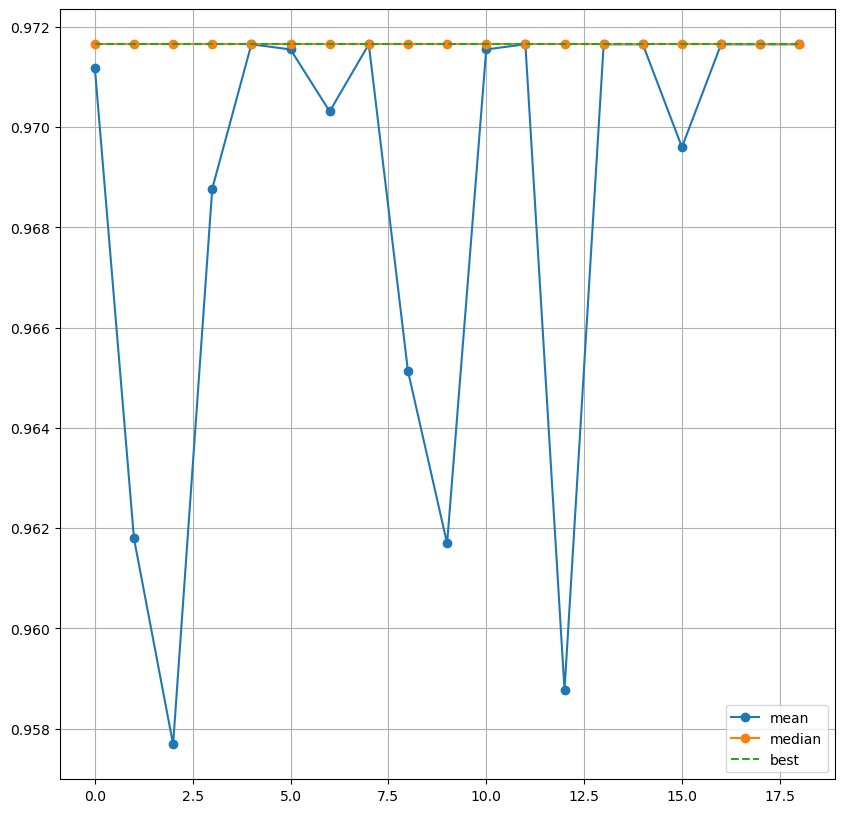

In [29]:
plt.clf()
plt.figure(figsize=(10, 10))
plt.plot(np.arange(len(res_mean)), res_mean, "-o", alpha=1, label="mean")
plt.plot(np.arange(len(res_med)), res_med, "-o", alpha=1, label="median")
plt.plot(np.arange(len(res_mean)), np.ones(len(res_mean)) * max(res_mean), "--", label="best")
plt.legend(loc="best")
plt.grid()
plt.show()